# wine dataset

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sn
import scipy, scipy.stats

from statsmodels.api import add_constant

In [7]:
data=pd.read_csv('wine dataset.csv')

In [8]:
data.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805


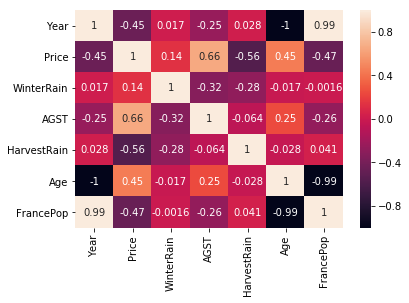

In [14]:
import seaborn as sns

sns.heatmap(data.corr(),annot=True)
plt.show()

In [26]:
x=data.iloc[:,[0,2,3,4,5,6]]
y=data.iloc[:,1]

x2= add_constant(x)
lm=sn.OLS(y,x2)
lm=lm.fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     18.47
Date:                Fri, 28 Dec 2018   Prob (F-statistic):           1.04e-06
Time:                        12:35:00   Log-Likelihood:                -2.1043
No. Observations:                  25   AIC:                             16.21
Df Residuals:                      19   BIC:                             23.52
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         6.58e-08   3.48e-05      0.002      

In [25]:
x=data.iloc[:,[0,2,3,4,5]]
y=data.iloc[:,1]

x2= add_constant(x)
lm=sn.OLS(y,x2)
lm=lm.fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     24.17
Date:                Fri, 28 Dec 2018   Prob (F-statistic):           2.04e-07
Time:                        12:34:10   Log-Likelihood:                -2.1622
No. Observations:                  25   AIC:                             14.32
Df Residuals:                      20   BIC:                             20.42
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.032e-05   4.32e-06      2.387      

In [27]:
x=data.iloc[:,[2,3,4,5]]
y=data.iloc[:,1]

x2= add_constant(x)
lm=sn.OLS(y,x2)
lm=lm.fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     24.17
Date:                Fri, 28 Dec 2018   Prob (F-statistic):           2.04e-07
Time:                        12:36:08   Log-Likelihood:                -2.1622
No. Observations:                  25   AIC:                             14.32
Df Residuals:                      20   BIC:                             20.42
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.4300      1.766     -1.942      

In [31]:
x2.head()

,const,WinterRain,AGST,HarvestRain,Age
0,1.0,600,17.1167,160,31
1,1.0,690,16.7333,80,30
2,1.0,502,17.1500,130,28
3,1.0,420,16.1333,110,26
4,1.0,582,16.4167,187,25


In [29]:
x.head()

,WinterRain,AGST,HarvestRain,Age
0,600,17.1167,160,31
1,690,16.7333,80,30
2,502,17.1500,130,28
3,420,16.1333,110,26
4,582,16.4167,187,25


In [36]:
linreg= LinearRegression()
x=data.iloc[:,[2,3,4,5]]
y=data.iloc[:,1]
linreg.fit(x,y)
pred=linreg.predict(x)

data['Prediction']=pred

SSE= round(np.sum((data.Price-pred)**2),3)
TSS= round(np.sum((data.Price-np.mean(data.Price))**2),3)
Rsq= round(1- (SSE/TSS),3)
mape= round(np.mean(abs((data.Price-pred)/data.Price)),3)

print('SSE = ', SSE, '\nTSS = ',TSS,'\nR Square = ', Rsq,'\nMAPE = ',mape)

SSE =  1.74 
TSS =  10.151 
R Square =  0.829 
MAPE =  0.033


In [37]:
data.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop,Prediction
0,1952,7.4950,600,17.1167,160,31,43183.569,7.715154
1,1953,8.0393,690,16.7333,80,30,43495.030,7.872937
2,1955,7.6858,502,17.1500,130,28,44217.857,7.677328
3,1957,6.9845,420,16.1333,110,26,45152.252,7.003355
4,1958,6.7772,582,16.4167,187,25,45653.805,7.019932


In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]


vifdf= pd.DataFrame()

vifdf['Columns'] = x.columns
vifdf['VIF values'] = vif

print(vifdf)

       Columns  VIF values
0   WinterRain   20.628199
1         AGST   34.898571
2  HarvestRain    5.293965
3          Age    6.457457


In [61]:
import random
for i in range(data.shape[0]):
    data['Junk'][i]= random.randint(0,50)

C:\Users\Gaurav\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
data.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop,Prediction,Junk
0,1952,7.4950,600,17.1167,160,31,43183.569,7.715154,13
1,1953,8.0393,690,16.7333,80,30,43495.030,7.872937,30
2,1955,7.6858,502,17.1500,130,28,44217.857,7.677328,47
3,1957,6.9845,420,16.1333,110,26,45152.252,7.003355,39
4,1958,6.7772,582,16.4167,187,25,45653.805,7.019932,16


In [63]:
x=data.iloc[:,[2,3,4,5]]
y=data.iloc[:,1]

x2= add_constant(x)
lm=sn.OLS(y,x2)
lm=lm.fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     24.17
Date:                Fri, 28 Dec 2018   Prob (F-statistic):           2.04e-07
Time:                        15:59:45   Log-Likelihood:                -2.1622
No. Observations:                  25   AIC:                             14.32
Df Residuals:                      20   BIC:                             20.42
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.4300      1.766     -1.942      

In [64]:
x=data.iloc[:,[2,3,4,5,8]]
y=data.iloc[:,1]

x2= add_constant(x)
lm=sn.OLS(y,x2)
lm=lm.fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     18.85
Date:                Fri, 28 Dec 2018   Prob (F-statistic):           8.92e-07
Time:                        15:59:54   Log-Likelihood:                -1.8912
No. Observations:                  25   AIC:                             15.78
Df Residuals:                      19   BIC:                             23.10
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.4246      1.792     -1.911      

In [65]:
error= abs(data.Price-pred)
error

0     0.220154
1     0.166363
2     0.008472
3     0.018855
4     0.242732
5     0.536374
6     0.238868
7     0.130509
8     0.125187
9     0.082417
10    0.250893
11    0.333167
12    0.188995
13    0.269394
14    0.018644
15    0.257827
16    0.271506
17    0.007522
18    0.324673
19    0.451579
20    0.275387
21    0.302278
22    0.197727
23    0.454697
24    0.274216
Name: Price, dtype: float64

In [66]:
import seaborn as sns

C:\Users\Gaurav\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


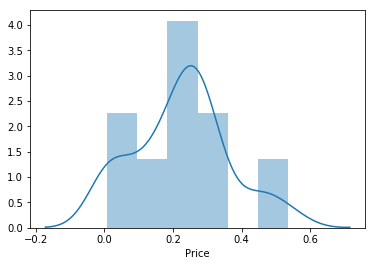

In [68]:
sns.distplot(error)
plt.show()

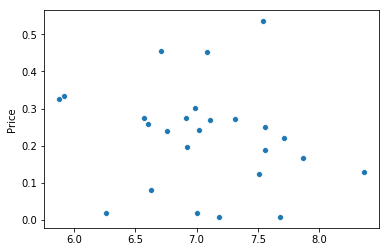

In [72]:
sns.scatterplot(pred,error)
plt.show()